<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/bcs-iitk/BCS_Workshop_Apr_20/blob/master/Machine_Learning/Assignment/ML.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/bcs-iitk/BCS_Workshop_Apr_20/blob/master/Machine_Learning/Assignment/ML.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://github.com/bcs-iitk/BCS_Workshop_Apr_20/raw/master/Machine_Learning/Assignment/ML.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

In [ ]:
# Copyright (c) 2020 Brain and Cognitive Society, IIT Kanpur [ BCS @IITK ]
# Copyright under MIT License, must reference https://github.com/bcs-iitk/BCS_Workshop_Apr_20 if used anywhere else.
# Author: Shashi Kant (http://shashikg.github.io/)



> Note: Do not forget to click on **Copy to Drive** in Google Colab to save a copy of this assignment.

![copy2drive](https://github.com/bcs-iitk/BCS_Workshop_Apr_20/raw/master/Machine_Learning/Assignment/copy2drive.png)



# Assignment 1: Machine Learning


## Question 1: Linear Regression
To check whether you are able to build simple linear regression model from scratch or not.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

!wget --no-check-certificate https://github.com/bcs-iitk/BCS_Workshop_Apr_20/raw/master/Machine_Learning/Assignment/X.npy -O X.npy
!wget --no-check-certificate https://github.com/bcs-iitk/BCS_Workshop_Apr_20/raw/master/Machine_Learning/Assignment/y.npy -O y.npy

--2020-04-05 16:54:21--  https://github.com/bcs-iitk/BCS_Workshop_Apr_20/raw/master/Machine_Learning/Assignment/X.npy
Resolving github.com (github.com)... 140.82.118.3
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bcs-iitk/BCS_Workshop_Apr_20/master/Machine_Learning/Assignment/X.npy [following]
--2020-04-05 16:54:21--  https://raw.githubusercontent.com/bcs-iitk/BCS_Workshop_Apr_20/master/Machine_Learning/Assignment/X.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 528 [application/octet-stream]
Saving to: ‘X.npy’

X.npy               100%[===================>]     528  --.-KB/s    in 0s      

2020-04-05 16:54:21 (95.5 MB/s) - ‘X.npy’ saved [5

In [ ]:
def load_data_LR():
  # Implement this function to read the dataset using the path declared in path_X and path_y
  # should return the X and y data
  # use np.load() to load the data google it you will get to know how to do it
  
  path_X = "X.npy"
  path_y = "y.npy"
  
  X = np.load(path_X)
  y = np.load(path_y)
  
  return X, y


In [ ]:
def get_linear_model(X, y):
  # This shoudl return a proper linear model without bias of type y = XW

  # Write your code here ----------
  D = X.shape[1]
  out_shape = y.shape[1]
  
  W = np.random.randn(D, out_shape)

  return W
  

In [ ]:
def MSE(y, y_pred):
  # should return the mean square error between the actual y and predicted y

  error = (np.square(y - y_pred).sum())/len(y)

  return error

In [ ]:
def train_by_algebra(X, y):
  # should return the trained weight 'W' using the linear algebra method i.e. setting dE/dW = 0
  xtxinv = np.matrix(np.dot((X.T),X)).I
  xty = np.dot(X.T,y) 
  W = np.dot(xtxinv,xty)
  return W
  

In [ ]:
def train_by_GD(X, y, epochs=5, lr=0.001):
  # should return the trained weight 'W' using the gradient descent for number of iterations equals to epochs
  # should also return error history int the cariable error_hist.shape = (epochs,); error_hist[i] = mean square error after epoch i-1
  # should also print mean square error after each epoch/ iteration
  # lr = "learning rate" i.e. eta
  error_hist = np.zeros(epochs)
  W = get_linear_model(X, y)
  y_pred = X*W
  
  for i in range(epochs):
    W = W + lr*(np.dot(X.T,(y-X*W)))
    y_pred = X*W
    error_hist[i] =  MSE(y, y_pred)
    
  return W,error_hist


### Now write a complete code using the function defined above to learn the model for following cases:

##### Learn **W** using linear algebra method and prints mean square error between actual y and predicted y. Use `y_pred = XW`

In [ ]:
# Write your code here ----------
X,y = load_data_LR()  
W = train_by_algebra(X, y)
y_pred = X*W
print(MSE(y, y_pred))

5.49005982064382


##### Learn **W** using gradient descent method for following learning rates, `lr = [10, 1, 0.1, 0.01, 0.001]` for **10 epochs**. Plot **MSE vs epochs** for each of them.

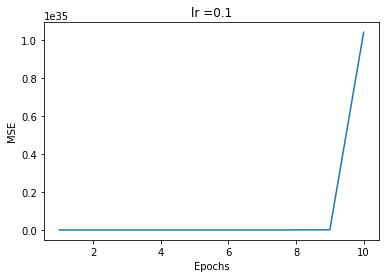

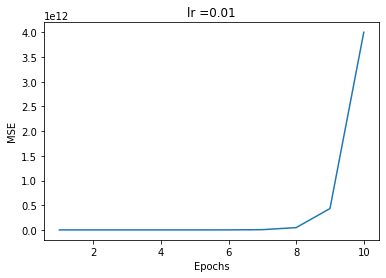

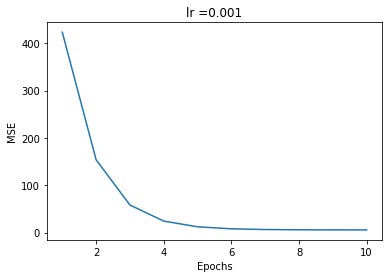

In [ ]:
# Write your code here ----------
lr = [0.1,0.01,0.001]
for i in lr:
  X,y = load_data_LR()
  w,error_history = train_by_GD(X, y, epochs=10, lr= i )
  Y = [*range(1,11)]
  plt.figure()
  plt.plot(Y,error_history)
  plt.xlabel('Epochs')
  plt.ylabel('MSE')
  plt.title('lr ={}'.format(i))

## Question 2: Image Classification in Tensorflow using Deep Learning
To check whether you are able to build a given neural network model in tensorflow or not. First we will build a fully connected NN model second we will build a CNN model.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation,MaxPooling2D,Conv2D
import matplotlib.pyplot as plt

In [ ]:
def plot_history(history):
  # function to plot accuracy vs epoch

  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')

In [ ]:
def load_data_cifar10_norm():
  # should return the normalised cifar10 dataset by loading it from tensorflow
  # link: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/
  cifar = tf.keras.datasets.cifar10
  (x_train, y_train), (x_test, y_test) = cifar.load_data()
  x_train,x_test = x_train/255.0,x_test/255.0
  return x_train, y_train, x_test, y_test
 

### Define a fully connected neural network model with following attributes:

*   Total number of **hidden layers = 4**, all with **relu** activation
*   Number of neurons in **first hidden layer = 7200**
*   Number of neurons in **second hidden layer = 2304**
*   Number of neurons in **third hidden layer = 1024**
*   Number of neurons in **fourth hidden layer = 64**


In [ ]:
def build_fc_model(input_shape=(32, 32, 3), num_class=10):
  
  model = Sequential()

  model.add(Flatten(input_shape=input_shape))

  model.add(Dense(7200))
  model.add(Activation('relu'))
    
  model.add(Dense(2304))
  model.add(Activation('relu'))
    
  model.add(Dense(1024))
  model.add(Activation('relu'))
    
  model.add(Dense(64))
  model.add(Activation('relu'))
  model.add(Dense(num_class, activation='softmax'))
  return model

### Define a CNN model with following attribute:

*   Total number of **hidden layer = 4**
*   After every convolutional layer there must be a MaxPoolingLayer of size (2, 2)
*   Total number of convolutional layer = 3, all with **relu** activation.
    *    Number of filters in **first convolutional layer = 32**
    *    Number of filters in **second convolutional layer = 64**
    *    Number of filters in **third convolutional layer = 64**
*   After all convolutional layer flatten the output and use **dense layer of 64 neurons**



In [ ]:
def build_cnn_model(input_shape=(32, 32, 3), num_class=10):
  # should return a sequential model defined based on the above attributes
  # do not compile the model

  model = tf.keras.models.Sequential([
     tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape=input_shape),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',input_shape=input_shape),
     tf.keras.layers.MaxPooling2D(2,2), 
     tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',input_shape=input_shape),
     tf.keras.layers.MaxPooling2D(2,2),                             
  ])
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))

  model.add(Dense(num_class,activation = 'softmax'))
  return model

### Compile and train the fully connected neural network model using the above functions.

170500096/170498071 [==============================] - 6s 0us/step
Epoch 1/10
98/98 [==============================] - 2s 25ms/step - loss: 2.0595 - accuracy: 0.2636 - val_loss: 1.9320 - val_accuracy: 0.3147
Epoch 2/10
98/98 [==============================] - 2s 23ms/step - loss: 1.8978 - accuracy: 0.3322 - val_loss: 1.8312 - val_accuracy: 0.3568
Epoch 3/10
98/98 [==============================] - 2s 24ms/step - loss: 1.8272 - accuracy: 0.3583 - val_loss: 1.8488 - val_accuracy: 0.3475
Epoch 4/10
98/98 [==============================] - 2s 23ms/step - loss: 1.7834 - accuracy: 0.3740 - val_loss: 1.7711 - val_accuracy: 0.3838
Epoch 5/10
98/98 [==============================] - 2s 23ms/step - loss: 1.7393 - accuracy: 0.3913 - val_loss: 1.7592 - val_accuracy: 0.3819
Epoch 6/10
98/98 [==============================] - 2s 23ms/step - loss: 1.7143 - accuracy: 0.3999 - val_loss: 1.7185 - val_accuracy: 0.3991
Epoch 7/10
98/98 [==============================] - 2s 23ms/step - loss: 1.6789 - accur

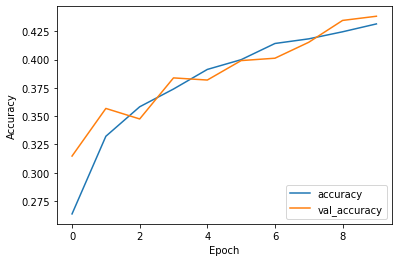

In [ ]:
 model = build_fc_model(input_shape=(32, 32, 3), num_class=10)
 model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                  optimizer='sgd',
                  metrics=['accuracy'])
    
x_train, y_train, x_test, y_test =load_data_cifar10_norm()
history = model.fit(x_train, y_train, epochs=10, batch_size=512,
                    validation_data=(x_test, y_test))

plot_history(history)
model.summary()

### Compile and train the CNN model using the above functions.

Epoch 1/10
98/98 [==============================] - 1s 14ms/step - loss: 1.9555 - accuracy: 0.2835 - val_loss: 1.6981 - val_accuracy: 0.3847
Epoch 2/10
98/98 [==============================] - 1s 12ms/step - loss: 1.5925 - accuracy: 0.4182 - val_loss: 1.5294 - val_accuracy: 0.4424
Epoch 3/10
98/98 [==============================] - 1s 12ms/step - loss: 1.4434 - accuracy: 0.4794 - val_loss: 1.4142 - val_accuracy: 0.4960
Epoch 4/10
98/98 [==============================] - 1s 12ms/step - loss: 1.3622 - accuracy: 0.5109 - val_loss: 1.3502 - val_accuracy: 0.5208
Epoch 5/10
98/98 [==============================] - 1s 12ms/step - loss: 1.2808 - accuracy: 0.5442 - val_loss: 1.2783 - val_accuracy: 0.5449
Epoch 6/10
98/98 [==============================] - 1s 12ms/step - loss: 1.2341 - accuracy: 0.5607 - val_loss: 1.2093 - val_accuracy: 0.5691
Epoch 7/10
98/98 [==============================] - 1s 12ms/step - loss: 1.1917 - accuracy: 0.5806 - val_loss: 1.2488 - val_accuracy: 0.5598
Epoch 8/10
98

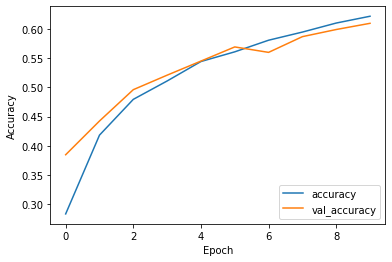

In [ ]:
model = build_cnn_model(input_shape=(32, 32, 3), num_class=10)
model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
              optimizer='Adam',metrics=['accuracy'])
x_train, y_train, x_test, y_test = load_data_cifar10_norm()

history = model.fit(x_train, y_train, epochs=10, batch_size=512,
                    validation_data=(x_test, y_test))

plot_history(history)
model.summary()

### What do you observe? Compare both the model by looking at their Accuracy vs Epoch plot and total numbers of trainable parameters.

In [ ]:
print("CNN has better accuracy and val_accuracy")

CNN has better accuracy and val_accuracy


## Question 3: Image Classification in Tensorflow using Transfer Learning
In this we will again try to learn a classification model for **cifar10** but by using the concept of transfer learning. 

### Brief description on Transfer Learning:

The idea behind transfer learning for image classification is that when you train a model on a very large image dataset like ImageNet, then this model can effectivly serve as generic model of visual world. If you remember, a closer look at every CNN model gives you an idea that every CNN model used to have some sets of convolutional layers followed by a dense layer and finally at last a classification (output) layer. So, here the convolutional layer somewhat act as feature mapping function which maps the input image to an different dimensional space. And finally at the end you apply dense layer to classify the images based on those extracted features. <br>

**Inshort this what you do in a CNN model:**
![](https://github.com/bcs-iitk/BCS_Workshop_Apr_20/raw/master/Machine_Learning/Assignment/cnn_model.png)

So what we will do in transfer learning is that we will use some already pre-trained model which are trained on ImageNet dataset. Will only use its learned convolutional layers as a feature mapping function. And finally will learn a fully connected neural network on those features to classify the images.


### Attributes of Transfer Learning model to be build

*   Pre-trained weights of VGG16 will be used as feature extracter
*   After this flatten the output and use dense layer of **64 neurons**



In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import preprocess_input, VGG16

In [ ]:
def plot_history(history):
  # function to plot accuracy vs epoch
  plt.figure()
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')

In [ ]:
def load_data_cifar10():
  # should return the normalised cifar10 dataset by loading it from tensorflow
  # link: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/
  cifar = tf.keras.datasets.cifar10
  (x_train, y_train), (x_test, y_test) = cifar.load_data()
  x_train,x_test = x_train/255.0,x_test/255.0

  return preprocess_input(x_train), y_train, preprocess_input(x_test), y_test

In [ ]:
def build_tl_model(num_class=10):
  # should return the ccombined model using the VGG16 conv layers as conv layers
  # and for fully connected layer part use the above attributes.

  base_model = VGG16(input_shape=(32, 32, 3), include_top=False, weights='imagenet') # this is the conv layers from VGG16
  base_model.trainable = False # this ensures that while training the dense layers these weights don't get changed

  model = tf.keras.models.Sequential([
    # Feature extractor 
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers(Dense(num_class,activation='softmax'))
    # Flatten and use the attribute given the question to build the dense part
    
  ])
  
  return model

### Compile and train the model using above functions, use adam optimiser with learning rate = 0.001 and 0.0001



Epoch 1/10
98/98 [==============================] - 1s 15ms/step - loss: 1.1047 - accuracy: 0.6161 - val_loss: 1.1029 - val_accuracy: 0.6159
Epoch 2/10
98/98 [==============================] - 1s 12ms/step - loss: 1.0369 - accuracy: 0.6381 - val_loss: 1.0742 - val_accuracy: 0.6226
Epoch 3/10
98/98 [==============================] - 1s 12ms/step - loss: 1.0217 - accuracy: 0.6452 - val_loss: 1.0598 - val_accuracy: 0.6317
Epoch 4/10
98/98 [==============================] - 1s 12ms/step - loss: 1.0019 - accuracy: 0.6525 - val_loss: 1.0757 - val_accuracy: 0.6241
Epoch 5/10
98/98 [==============================] - 1s 12ms/step - loss: 0.9783 - accuracy: 0.6606 - val_loss: 1.0311 - val_accuracy: 0.6411
Epoch 6/10
98/98 [==============================] - 1s 12ms/step - loss: 0.9577 - accuracy: 0.6690 - val_loss: 1.0212 - val_accuracy: 0.6455
Epoch 7/10
98/98 [==============================] - 1s 12ms/step - loss: 0.9460 - accuracy: 0.6733 - val_loss: 1.0170 - val_accuracy: 0.6462
Epoch 8/10
98

<Figure size 432x288 with 0 Axes>

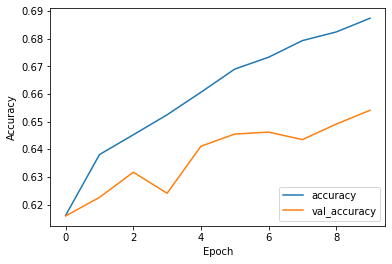

<Figure size 432x288 with 0 Axes>

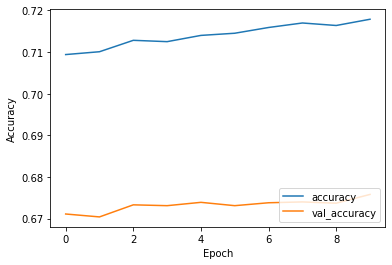

In [ ]:
for i in [0.001,0.0001]:

  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = i),loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
  history = model.fit(x_train, y_train, epochs=10, batch_size=512,
                    validation_data=(x_test, y_test))
  plt.figure()
  plot_history(history)
  model.summary()